In [4]:
!git clone https://github.com/YvanYin/Metric3D.git

Cloning into 'Metric3D'...
remote: Enumerating objects: 760, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 760 (delta 75), reused 88 (delta 61), pack-reused 592
Receiving objects: 100% (760/760), 290.65 MiB | 33.18 MiB/s, done.
Resolving deltas: 100% (331/331), done.


In [1]:
%cd /DreamCraft3D/Metric3D

/DreamCraft3D/Metric3D


/opt/conda/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import torch
from PIL import Image
import requests
from io import BytesIO
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os


image_path = 'a white bowl of multiple fruits_rgba.png'

if not os.path.exists(image_path):
    raise FileNotFoundError(f"The file at {image_path} was not found.")

image = Image.open(image_path).convert('RGB')
# Preprocess the image
transform = transforms.Compose([
    #transforms.Resize((2000, 2000)),  # Resize image to 256x256
    transforms.ToTensor(),         # Convert to tensor
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
rgb = transform(image).unsqueeze(0)  # Add batch dimension

# Move the image to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rgb = rgb.to(device)

# Load the model
model = torch.hub.load('yvanyin/metric3d', 'metric3d_vit_small', pretrain=True).to(device)

# Run inference
pred_depth, confidence, output_dict = model.inference({'input': rgb})



Using cache found in /root/.cache/torch/hub/yvanyin_metric3d_main
/root/.cache/torch/hub/yvanyin_metric3d_main/mono/model/decode_heads/RAFTDepthNormalDPTDecoder5.py:146: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(x, self.weight, bias=self.bias, stride=self.stride, padding=self.padding, dilation=self.dilation, groups=self.groups)


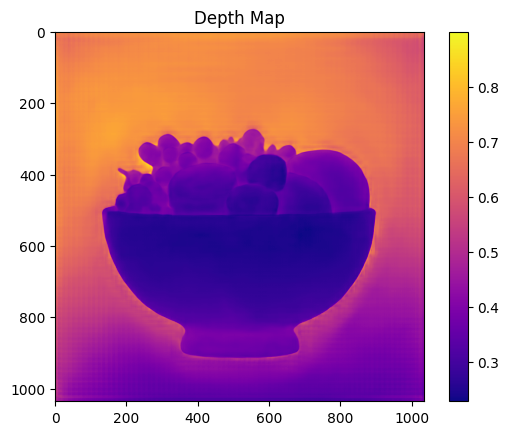

In [3]:
depth_map = pred_depth.squeeze().cpu().numpy()

plt.imshow(depth_map, cmap='plasma')
plt.colorbar()
plt.title('Depth Map')
plt.show()

Using cache found in /root/.cache/torch/hub/yvanyin_metric3d_main
/root/.cache/torch/hub/yvanyin_metric3d_main/mono/model/decode_heads/RAFTDepthNormalDPTDecoder5.py:146: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 54.71 GiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(x, self.weight, bias=self.bias, stride=self.stride, padding=self.padding, dilation=self.dilation, groups=self.groups)


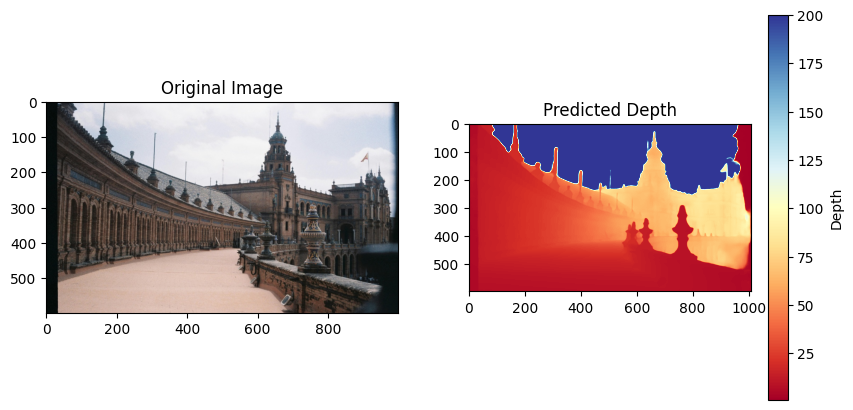

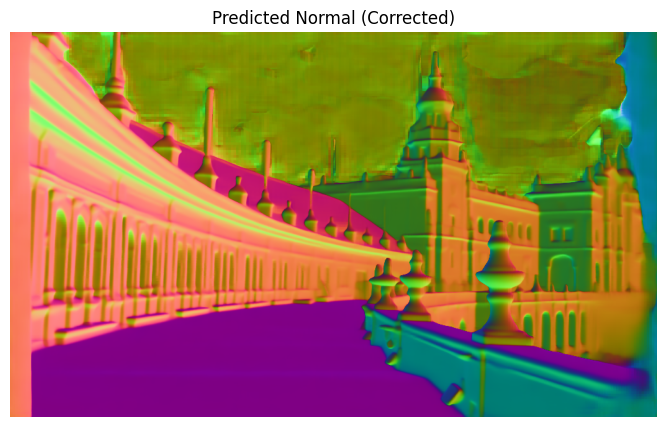

In [4]:
import torch
from PIL import Image
import requests
from io import BytesIO
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

image_url = 'https://jugghm.github.io/Metric3Dv2/resource_new/depth/street2.jpg'

# Get the image from the URL
response = requests.get(image_url)
response.raise_for_status()  # Check that the request was successful

# Open the image directly from the response content
image = Image.open(BytesIO(response.content)).convert('RGB')

# Preprocess the image
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
])
rgb = transform(image).unsqueeze(0)  # Add batch dimension

# Move the image to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rgb = rgb.to(device)

# Load the model
model = torch.hub.load('yvanyin/metric3d', 'metric3d_vit_giant2', pretrain=True).to(device)

# Run inference
with torch.no_grad():
    pred_depth, confidence, output_dict = model.inference({'input': rgb})

# Process and visualize predicted depth
pred_depth = pred_depth.squeeze().cpu().numpy()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Predicted Depth')
plt.imshow(pred_depth, cmap='RdYlBu')
plt.colorbar(label='Depth')
plt.show()

if 'prediction_normal' in output_dict:
    pred_normal = output_dict['prediction_normal'][:, :3, :, :].squeeze().cpu().numpy()
    pred_normal_vis = pred_normal.transpose(1, 2, 0)

    # Normalize the normal map to [0, 1] for visualization
    pred_normal_vis = (pred_normal_vis+1) / 2  # Values will be in range [0, 1]

    plt.figure(figsize=(10, 5))
    plt.title('Predicted Normal (Corrected)')
    plt.imshow(pred_normal_vis)
    plt.axis('off')
    plt.show()


Using cache found in /root/.cache/torch/hub/yvanyin_metric3d_main


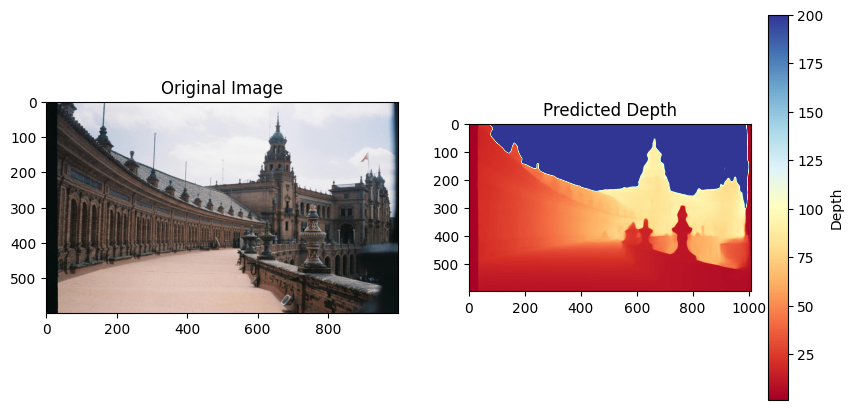

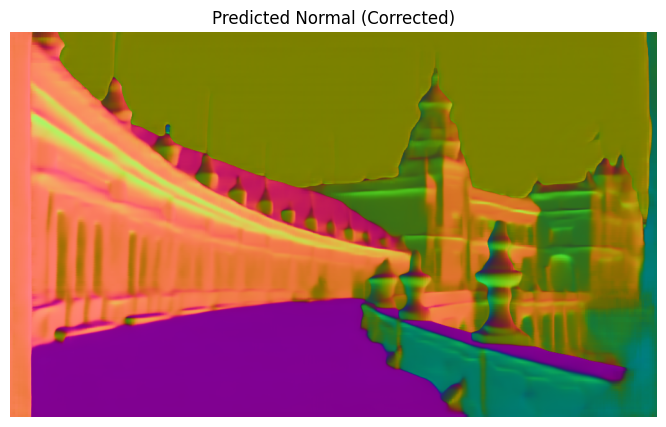

In [5]:
import torch
from PIL import Image
import requests
from io import BytesIO
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

image_url = 'https://jugghm.github.io/Metric3Dv2/resource_new/depth/street2.jpg'

# Get the image from the URL
response = requests.get(image_url)
response.raise_for_status()  # Check that the request was successful

# Open the image directly from the response content
image = Image.open(BytesIO(response.content)).convert('RGB')

# Preprocess the image
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
])
rgb = transform(image).unsqueeze(0)  # Add batch dimension

# Move the image to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rgb = rgb.to(device)

# Load the model
model = torch.hub.load('yvanyin/metric3d', 'metric3d_vit_small', pretrain=True).to(device)

# Run inference
with torch.no_grad():
    pred_depth, confidence, output_dict = model.inference({'input': rgb})

# Process and visualize predicted depth
pred_depth = pred_depth.squeeze().cpu().numpy()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Predicted Depth')
plt.imshow(pred_depth, cmap='RdYlBu')
plt.colorbar(label='Depth')
plt.show()

if 'prediction_normal' in output_dict:
    pred_normal = output_dict['prediction_normal'][:, :3, :, :].squeeze().cpu().numpy()
    pred_normal_vis = pred_normal.transpose(1, 2, 0)

    # Normalize the normal map to [0, 1] for visualization
    pred_normal_vis = (pred_normal_vis+1) / 2  # Values will be in range [0, 1]

    plt.figure(figsize=(10, 5))
    plt.title('Predicted Normal (Corrected)')
    plt.imshow(pred_normal_vis)
    plt.axis('off')
    plt.show()


Using cache found in /root/.cache/torch/hub/yvanyin_metric3d_main


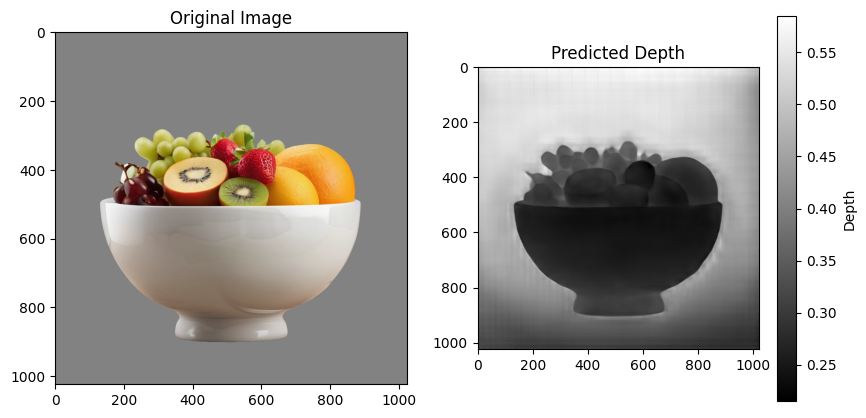

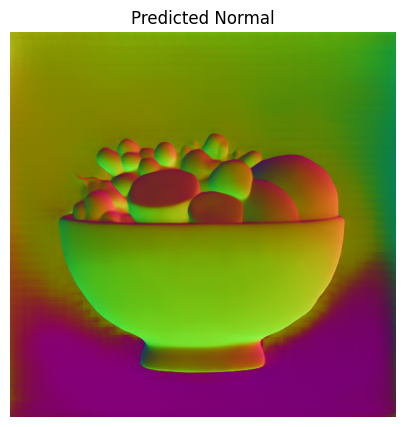

In [6]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

def preprocess_image(image_path, input_size, intrinsic):
    rgb_origin = cv2.imread(image_path)[:, :, ::-1]
    
    # Adjust input size to fit pretrained model, keep ratio resize
    h, w = rgb_origin.shape[:2]
    scale = min(input_size[0] / h, input_size[1] / w)
    rgb = cv2.resize(rgb_origin, (int(w * scale), int(h * scale)), interpolation=cv2.INTER_LINEAR)
    
    # Scale intrinsic parameters
    intrinsic = [intrinsic[0] * scale, intrinsic[1] * scale, intrinsic[2] * scale, intrinsic[3] * scale]
    
    # Padding to input_size
    padding = [123.675, 116.28, 103.53]
    h, w = rgb.shape[:2]
    pad_h = input_size[0] - h
    pad_w = input_size[1] - w
    pad_h_half = pad_h // 2
    pad_w_half = pad_w // 2
    rgb = cv2.copyMakeBorder(rgb, pad_h_half, pad_h - pad_h_half, pad_w_half, pad_w - pad_w_half, cv2.BORDER_CONSTANT, value=padding)
    pad_info = [pad_h_half, pad_h - pad_h_half, pad_w_half, pad_w - pad_w_half]

    # Normalize
    mean = torch.tensor([123.675, 116.28, 103.53]).float()[:, None, None]
    std = torch.tensor([58.395, 57.12, 57.375]).float()[:, None, None]
    rgb = torch.from_numpy(rgb.transpose((2, 0, 1))).float()
    rgb = torch.div((rgb - mean), std)
    rgb = rgb[None, :, :, :].cuda()
    return rgb_origin, rgb, intrinsic, pad_info

def unpad_and_resize(tensor, pad_info, original_shape):
    pad_h_half, pad_h, pad_w_half, pad_w = pad_info
    tensor = tensor[:, pad_h_half:tensor.shape[1] - pad_h, pad_w_half:tensor.shape[2] - pad_w]
    tensor = torch.nn.functional.interpolate(tensor.unsqueeze(0), size=original_shape, mode='bilinear').squeeze()
    return tensor

def main():
    image_path = 'a white bowl of multiple fruits_rgba.png'
    intrinsic = [707.0493, 707.0493, 604.0814, 180.5066]
    input_size = (616, 1064)  # for vit model

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"The file at {image_path} was not found.")

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Preprocess the image
    rgb_origin, rgb, intrinsic, pad_info = preprocess_image(image_path, input_size, intrinsic)
    rgb = rgb.to(device)

    # Load the model
    model = torch.hub.load('yvanyin/metric3d', 'metric3d_vit_small', pretrain=True).to(device)

    # Run inference
    with torch.no_grad():
        pred_depth, confidence, output_dict = model.inference({'input': rgb})

    # Unpad and resize predicted depth to original size
    pred_depth = pred_depth.squeeze().cpu()
    pred_depth = unpad_and_resize(pred_depth.unsqueeze(0), pad_info, rgb_origin.shape[:2]).squeeze()

    # De-canonical transform
    canonical_to_real_scale = intrinsic[0] / 1000.0  # 1000.0 is the focal length of canonical camera
    pred_depth = pred_depth * canonical_to_real_scale  # now the depth is metric
    pred_depth = torch.clamp(pred_depth, 0, 300)

    # Visualize original image and predicted depth
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(rgb_origin)
    plt.subplot(1, 2, 2)
    plt.title('Predicted Depth')
    plt.imshow(pred_depth.numpy(), cmap='gray')
    plt.colorbar(label='Depth')
    plt.show()

    # Visualize predicted normal if available
    if 'prediction_normal' in output_dict:  # only available for Metric3Dv2, i.e. vit model
        pred_normal = output_dict['prediction_normal'][:, :3, :, :]
        normal_confidence = output_dict['prediction_normal'][:, 3, :, :] # see https://arxiv.org/abs/2109.09881 for details
        # un pad and resize to some size if needed
        pred_normal = pred_normal.squeeze()
        pred_normal = pred_normal[:, pad_info[0] : pred_normal.shape[1] - pad_info[1], pad_info[2] : pred_normal.shape[2] - pad_info[3]]
        # you can now do anything with the normal
        # such as visualize pred_normal
        pred_normal_vis = pred_normal.cpu().numpy().transpose((1, 2, 0))
        pred_normal_vis = (pred_normal_vis + 1) / 2
               
        # Save and show the normal visualization
        cv2.imwrite('normal_vis.png', (pred_normal_vis * 255).astype(np.uint8))
        plt.figure(figsize=(10, 5))
        plt.title('Predicted Normal')
        plt.imshow(pred_normal_vis)
        plt.axis('off')
        plt.show()

if __name__ == '__main__':
    main()

